### 04 -04-2020

### Objectives
* understanding UnSupervised learning
* what is clustring
* types of clustering
* KMeans


### UNsupervised learning
* there is no target infomation
* all you do is find relationship betwen data 
* no easy way to verify if you have a good modeling or not
* clustering is a type of unsupervised learning

### Clustering
* find similar data & cluster/group them together
* types of cluster - Partition based & hierarchial

### patitioning based clustering
* find clusters connected to same centriod

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X,Y = make_blobs(n_features = 2,n_samples = 1000)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

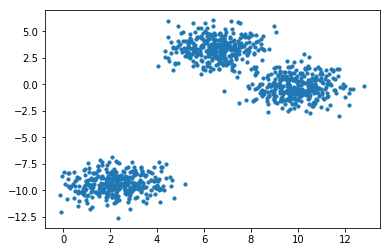

In [4]:
plt.scatter(X[:,0],X[:,1], s=10)


In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters = 3)

In [7]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
kmeans.labels_[:20]

array([0, 2, 0, 1, 2, 1, 2, 1, 2, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0])

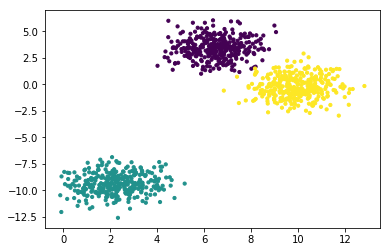

In [9]:
plt.scatter(X[:,0],X[:,1],s=10, c = kmeans.labels_)

In [10]:
import pandas as pd

In [11]:
house_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt',index_col='Unnamed: 0')

In [12]:
house_data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [13]:
house = house_data[['Sqft','Price']]

In [14]:
kmeans = KMeans(n_clusters = 3)

In [15]:
kmeans.fit(house)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
house['type'] = kmeans.labels_

C:\Users\saket\Anaconda333\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
house.sample(10)

,Sqft,Price,type
354,1384.062,49800,0
37,434.076,43500,0
120,391.380,22000,0
372,640.440,45000,0
460,1487.244,36000,0
279,1245.300,37000,0
128,1280.880,57000,0
518,1889.298,69500,2
97,1956.900,66000,2
26,1779.000,98000,2


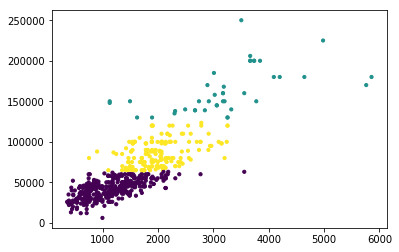

In [18]:
plt.scatter(house.Sqft,house.Price,c=house.type,s = 10)

In [19]:
from skimage.io import imread,imshow

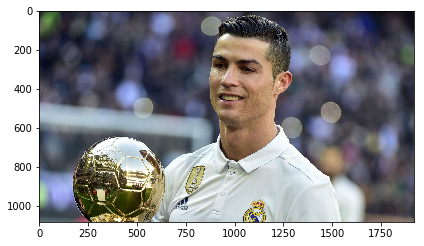

In [20]:
imshow("C:\\Users\\saket\\Downloads\\cr7.jpg")

In [21]:
img = imread("C:\\Users\\saket\\Downloads\\cr7.jpg")

In [22]:
img.shape

(1080, 1920, 3)

### image processing needs them to converted in scale of 0-1

In [23]:
img = img/255

In [24]:
img.shape

(1080, 1920, 3)

* similar color pixel belongs to same cluster 
* the centroid of the cluster will representing the entire cluster

In [25]:
kmeans = KMeans(n_clusters=6)

In [26]:
img_tf = img.reshape(1080*1920,3)

In [27]:
img_tf.shape

(2073600, 3)

In [28]:
kmeans.fit(img_tf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
kmeans.labels_

array([5, 5, 5, ..., 3, 3, 3])

In [30]:
kmeans.cluster_centers_

array([[0.72127918, 0.60363057, 0.46286612],
       [0.284951  , 0.27782314, 0.31599763],
       [0.85054934, 0.88374321, 0.88534452],
       [0.43160889, 0.42032959, 0.45205736],
       [0.6097622 , 0.66090124, 0.74168746],
       [0.16028542, 0.158618  , 0.18230845]])

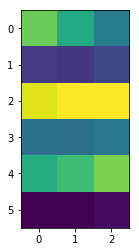

In [31]:
plt.imshow(kmeans.cluster_centers_)

In [32]:
img_com = kmeans.cluster_centers_[[kmeans.labels_]]

C:\Users\saket\Anaconda333\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


* replace color of pixel by centroids color

In [33]:
img_com

array([[0.16028542, 0.158618  , 0.18230845],
       [0.16028542, 0.158618  , 0.18230845],
       [0.16028542, 0.158618  , 0.18230845],
       ...,
       [0.43160889, 0.42032959, 0.45205736],
       [0.43160889, 0.42032959, 0.45205736],
       [0.43160889, 0.42032959, 0.45205736]])

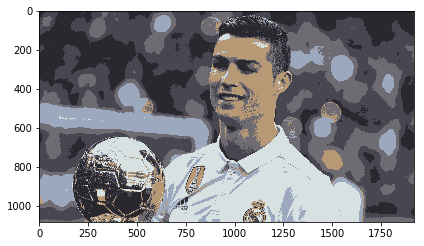

In [34]:
imshow(img_com.reshape(1080, 1920, 3))